In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")

# Display all columns when printing
pd.set_option("display.max_columns", None)


In [ ]:
# Load the raw dataset
# Path to raw data
DATA_PATH = "../data/raw/complaints.csv"

df = pd.read_csv(DATA_PATH)


C:\Users\bia\AppData\Local\Temp\ipykernel_2732\2400362248.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


: 

In [ ]:
# discover column names(no heavy loads)

import pandas as pd

# Read only the header (0 rows)
df_head = pd.read_csv(
    "../data/raw/complaints.csv",
    nrows=0
)

df_head.columns


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [3]:
# Inspect a tiny sample of rows

df_sample = pd.read_csv(
    "../data/raw/complaints.csv",
    nrows=5_000
)

df_sample.head()


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,Experian Information Solutions Inc.,FL,32092,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,NaN,NaN,Web,2025-06-20,Closed with explanation,Yes,NaN,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,Experian Information Solutions Inc.,AZ,85225,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,NaN,NaN,Experian Information Solutions Inc.,IL,60628,NaN,NaN,Web,2025-06-20,In progress,Yes,NaN,14195692


In [5]:
# Discover product values (without loading everything)

df_sample["Product"].value_counts()


Product
Credit reporting or other personal consumer reports        4839
Debt collection                                             124
Credit card                                                  15
Checking or savings account                                   9
Money transfer, virtual currency, or money service            4
Payday loan, title loan, personal loan, or advance loan       3
Vehicle loan or lease                                         2
Debt or credit management                                     2
Mortgage                                                      2
Name: count, dtype: int64

In [6]:
# Confirm the narrative column
# Checking which column contains text

df_sample.columns


Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

selected products are :
PRODUCTS = [
    "Credit card",
    "Payday loan, title loan, personal loan, or advance loan",
    "Checking or savings account",
    "Money transfer, virtual currency, or money service"
]
BNPL complaints were not present in the dataset and were therefore excluded.

In [7]:
# Full chunked filtering

import pandas as pd

PRODUCTS = [
    "Credit card",
    "Payday loan, title loan, personal loan, or advance loan",
    "Checking or savings account",
    "Money transfer, virtual currency, or money service"
]

COLUMNS = ["Product", "Consumer complaint narrative"]

first = True

for chunk in pd.read_csv(
    "../data/raw/complaints.csv",
    usecols=COLUMNS,
    chunksize=100_000,
    low_memory=False
):
    # Keep only chosen products
    chunk = chunk[chunk["Product"].isin(PRODUCTS)]
    
    # Remove empty narratives
    chunk = chunk[chunk["Consumer complaint narrative"].notna()]
    chunk = chunk[chunk["Consumer complaint narrative"].str.strip() != ""]
    
    if not chunk.empty:
        chunk.to_csv(
            "../data/processed/filtered_complaints.csv",
            mode="w" if first else "a",
            index=False,
            header=first
        )
        first = False


In [8]:
# loading the filtered data

df = pd.read_csv("../data/processed/complaints_filtered.csv")


In [9]:
# Show first few rows
df.head()


,Product,Consumer complaint narrative
0,Credit card,A XXXX XXXX card was opened under my name by a...
1,Checking or savings account,I made the mistake of using my wellsfargo debi...
2,Credit card,"Dear CFPB, I have a secured credit card with c..."
3,Credit card,I have a Citi rewards cards. The credit balanc...
4,Credit card,b'I am writing to dispute the following charge...


In [10]:
# Check shape (rows, columns)
df.shape


(327070, 2)

In [11]:
# Column names
df.columns


Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [12]:
# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327070 entries, 0 to 327069
Data columns (total 2 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Product                       327070 non-null  object
 1   Consumer complaint narrative  327070 non-null  object
dtypes: object(2)
memory usage: 5.0+ MB


In [13]:
df["Product"].value_counts().head(10)


Product
Checking or savings account                                140319
Money transfer, virtual currency, or money service          97188
Credit card                                                 80667
Payday loan, title loan, personal loan, or advance loan      8896
Name: count, dtype: int64

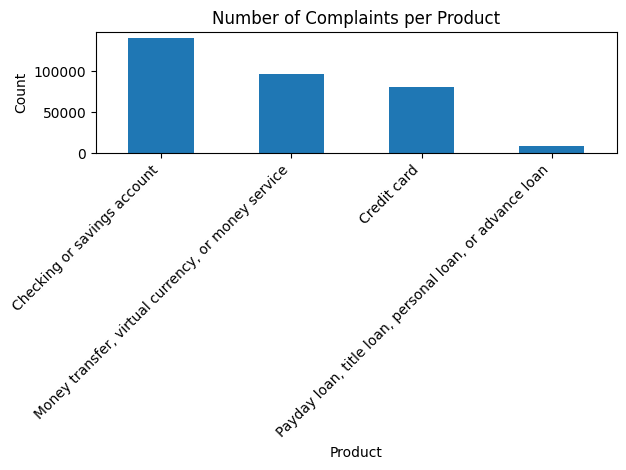

In [16]:
import matplotlib.pyplot as plt

product_counts.plot(kind="bar")
plt.title("Number of Complaints per Product")
plt.xlabel("Product")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [26]:
# Create word count column
df["narrative_word_count"] = (
    df["Consumer complaint narrative"]
    .fillna("")
    .apply(lambda x: len(x.split()))
)


In [27]:
# Complaint length analysis

df["complaint_length"] = df["Consumer complaint narrative"].str.len()
df["complaint_length"].describe()


count    327070.000000
mean       1112.830541
std        1260.495044
min           4.000000
25%         467.000000
50%         729.000000
75%        1342.000000
max       32959.000000
Name: complaint_length, dtype: float64

The complaints are long on average.

Average length: ~1,112 characters.

Median length: 729 characters.

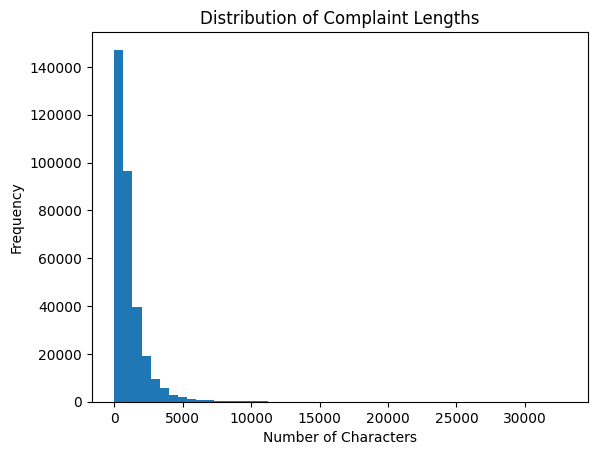

In [28]:
# Plot the length distribution

plt.hist(df["complaint_length"], bins=50)
plt.title("Distribution of Complaint Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()


In [29]:
# Check for missing narratives

df["Consumer complaint narrative"].isna().sum()


np.int64(0)

✔ Filtering worked
✔ Data is safe for NLP

In [30]:
# Quick qualitative check

df["Consumer complaint narrative"].sample(5)


153020    I was a victim of fraud. A person posted an ad...
225146    My account was frozen and closed by CitiBank. ...
300819    Wells Fargo owes me compensation for my accoun...
240688    I had issue with Bank of America last week XX/...
100665    I took a cruise on XX/XX/2023 on XXXX XXXX  on...
Name: Consumer complaint narrative, dtype: object

CFPB policy:

Names → replaced with XXXX

Dates → XX/XX/2023

Account numbers → XXXX XXXX XXXX

This is done for privacy and legal reasons.

📌 This is NOT noise or corruption
📌 This is NOT a data quality problem

In [34]:
# Normalize redactions

import re

def normalize_redactions(text):
    text = re.sub(r'X{2,}', '<REDACTED>', text)
    text = re.sub(r'\b\d{2}/\d{2}/\d{4}\b', '<DATE>', text)
    return text

df["clean_text"] = df["Consumer complaint narrative"].apply(normalize_redactions)


Why this is good?
Keeps sentence flow
Reduces meaningless repetition
Improves embedding consistency

Normalization keeps placeholders, not emptiness.

In [35]:
# Lowercase everything

df["clean_text"] = df["clean_text"].str.lower()


Why

Bank and bank should mean the same thing
Reduces vocabulary size
Standard NLP practice

In [36]:
# Remove boilerplate phrases

BOILERPLATE = [
    "i am filing a complaint",
    "this complaint is regarding",
    "i am writing to complain",
    "i would like to file a complaint"
]

def remove_boilerplate(text):
    for phrase in BOILERPLATE:
        text = text.replace(phrase, "")
    return text

df["clean_text"] = df["clean_text"].apply(remove_boilerplate)


CFPB complaints often contain phrases like:

“I am filing a complaint”
“This complaint is regarding”

We remove these because they:

Appear in thousands of records
Add no semantic value

In [37]:
# Remove junk characters (NOT words)

df["clean_text"] = df["clean_text"].apply(
    lambda x: re.sub(r"[^a-z0-9\s<>]", "", x)
)


What this removes

Weird symbols
Excess punctuation
Random formatting noise

What it keeps

Words
Numbers
<REDACTED>, <DATE>

In [38]:
# Normalize whitespace

df["clean_text"] = df["clean_text"].apply(
    lambda x: re.sub(r"\s+", " ", x).strip()
)


Why

Removes extra spaces
Makes text clean and uniform

In [39]:
# Final sanity check

df[["Consumer complaint narrative", "clean_text"]].sample(3)


,Consumer complaint narrative,clean_text
138317,Incident 1 : I was contacted through XXXX by a...,incident 1 i was contacted through <redacted> ...
43926,"On XXXX XXXX, 2023, as the original creditor, ...",on <redacted> <redacted> 2023 as the original ...
11949,As for the debit card transactions related to ...,as for the debit card transactions related to ...


In [40]:
# Drop old column

df = df.drop(columns=["Consumer complaint narrative"])


In [41]:
df.to_csv(
    "../data/processed/filtered_complaints.csv",
    index=False
)


I completed EDA and preprocessing using chunked filtering, exploratory analysis, and structured text cleaning.